In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

### Read data

In [2]:
data = pd.read_csv('./data/Startups_funding.csv')

data.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
                'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']

# Clean the strings
def clean_strings(x):
    return str(x).replace('\\xc2\\xa0', '').replace('\\\\xc2\\\\xa0', '')


# Apply the function to clean the data
for cl in ['StartupName', 'IndustryVertical', 'SubVertical', 'City', 'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks']:
    data[cl] = data[cl].apply(lambda x: clean_strings(x))

data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [3]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [4]:
print("Size of data:", data.shape)

Size of data: (3044, 10)


### Cleaning data

In [5]:
warnings.filterwarnings('ignore')

# Calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())
           * 100).sort_values(ascending=False)

# Store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [7]:
# Check values in the remarks column
data['Remarks'].value_counts()

nan                          2625
Series A                      177
Series B                       64
Pre-Series A                   37
Series C                       28
                             ... 
Bridge funding                  1
Personal Investment             1
Minority stake, Strategic       1
Additional Funding              1
Yet to Launch platform          1
Name: Remarks, Length: 70, dtype: int64

In [8]:
# Remove remarks column, as it contains a lot of nans and high cardinal column
data = data.drop(['Remarks'], axis=1)

# Check column names after removing the remarks column, as it having
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

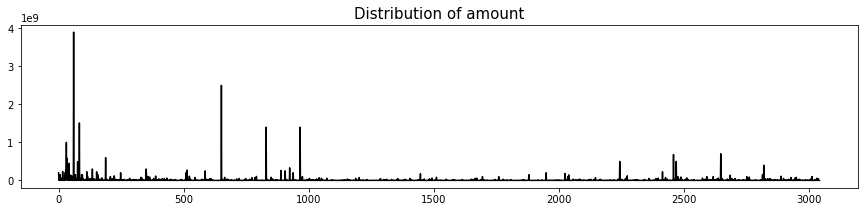

In [10]:
# Convert amount column into numericial, so that we can analyze the values inside it
# Clean the AmountInUSD column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in [
                '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(',', '').replace('+', '')
    x = str(x).lower().replace('undisclosed', '')
    x = str(x).lower().replace('n/a', '')
    if x == '':
        x = '-999'
    return x


# Apply the function on the column
data['AmountInUSD'] = data['AmountInUSD'].apply(
    lambda x: float(clean_amount(x)))

# Check head if the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind='line', color='black')
plt.title('Distribution of amount', fontsize=15)
plt.show()

In [11]:
# Cleaning dates
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'